In [13]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
np.random.seed(101)

In [20]:
def fit(x, y, c=0.):
    
    n_samples = x.shape[0]
    n_features = x.shape[1]
    
    # Create the kernel matrix
    K = y[:, None] * x
    K = np.dot(K, K.T)
    
    P = matrix(K)
    q = matrix(-np.ones((n_samples, 1)))

    # Hard margin :: -a_i <= 0  or (a_i >= 0)
    G_hard = matrix(-np.eye(n_samples))
    h_hard = matrix(np.zeros(n_samples))
    
    if (c != 0.):
        # slack :: a_i <= c
        G_slack = matrix(np.eye(n_samples))
        h_slack = matrix(np.ones(n_samples) * c)
        
        # stack vertically the g and h matrices respectively
        G = matrix(np.vstack((G_hard, G_slack)))
        h = matrix(np.vstack((h_hard, h_slack)))
        
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    
    solvers.options['show_progress'] = False
    
    # solve min (1/2 * x^T * P * x + q^T * x) s.t. (G * x <= h) and (A * x = b)
        # P = H a matrix of size m×m
        # q = −1  a vector of size m×1
        # G = −diag[1] a diagonal matrix of -1s of size m×m
        # h = 0 a vector of zeros of size m×1
        # A = y the label vector of size m×1
        # b = 0 a scalar
        
    if (c == 0.):
        sol = solvers.qp(P, q, G_hard, h_hard, A, b)
    else:
        sol = solvers.qp(P, q, G, h, A, b)
    
    # sol = solvers.qp(P, q, G, h, A, b)
    
    alphas = np.array(sol['x'])
    
    return alphas

In [21]:
def plot_data_with_labels(x, y, ax):
    unique = np.unique(y)
    
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        ax.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])

In [22]:
def plot_boundary(ax, w, b, xmax, xmin):
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    
    x = np.arange(xmin, xmax)
    
    ax.plot(x, x * slope + intercept, 'g--')

In [31]:
def generate_data(n_samples=4, n_features=2):
    
    # 2-D mean of ones
    mean1 = np.ones((n_features,))
    # 2-D mean of threes
    mean2 = 3 * np.ones((n_features,))

    # 2-D covariance of 0.3
    covar1 = np.diag(0.3 * np.ones((n_features,)))
    # 2-D covariance of 0.2
    covar2 = np.diag(0.2 * np.ones((n_features,)))

    # generate points from gaussian 1
    x1 = np.random.multivariate_normal(mean1, covar1, n_samples)
    # labels
    y1 = np.ones((x1.shape[0],))

    # generate points from gaussian 2
    x2 = np.random.multivariate_normal(mean2, covar2, n_samples)
    y2 = -np.ones((x2.shape[0],))

    # join
    x = np.concatenate((x1, x2), axis = 0)
    y = np.concatenate((y1, y2), axis = 0)

    return x, y

In [60]:
x, y = generate_data(4, 2)

COLORS = ['red', 'green']

# fit svm classifier
alphas = fit(x, y, c=10)
# print(alphas)

# only a few of the alphas should be non-zero & they will be the support vectors.
index = (alphas > 1e-5).reshape(-1)

# w  is equal to Σαi*yi*xi 
w = np.sum(alphas * y[:, None] * x, axis = 0)

# b is equal to yi−w.T*xi for any i such that αi>0.
b = y[index] - np.dot(x[index], w)
bias = b[0]

# normalize
# norm = np.linalg.norm(w)
# w, bias = w / norm, bias / norm

# Display results 
print('Alphas = ', alphas[alphas > 1e-5])
print('w = ', w.flatten())
print('Bias = ', bias)


Alphas =  [0.85723825 0.85723818]
w =  [-0.33173705 -1.2666599 ]
Bias =  3.37377815757719


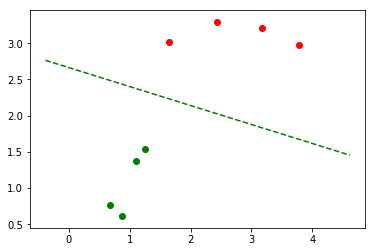

In [61]:
# show data and w
fig, ax = plt.subplots()

plot_boundary(ax, w, bias, x.max()+1, x.min()-1)
plot_data_with_labels(x, y, ax)
plt.show()

In [62]:
from sklearn.svm import SVC

clf_sklearn = SVC(kernel = 'linear', C=10)
clf_sklearn.fit(x, y.ravel()) 

print('Coefficients of the support vector = ', np.abs(clf_sklearn.dual_coef_))
print('w = ',clf_sklearn.coef_)
print('b = ',clf_sklearn.intercept_)


Coefficients of the support vector =  [[0.85723845 0.85723845]]
w =  [[-0.33173686 -1.26666006]]
b =  [3.37377835]


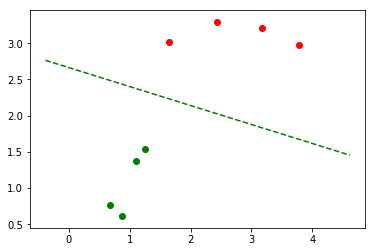

In [63]:
# show data and w
fig, ax = plt.subplots()

plot_boundary(ax, w, bias, x.max()+1, x.min()-1)
plot_data_with_labels(x, y, ax)
plt.show()